In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
print indx

In [2]:
np.set_printoptions(precision=11)
print len(indx)
print indx
print v_z

1311878
[  2.86649720500e+09   2.86649739900e+09   2.86472580100e+09 ...,
   2.86257094900e+09   2.86220071500e+09   2.85920474100e+09]
[-112.41   79.92 -141.96 ...,  -92.4   163.62  168.21]


In [16]:
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

In [4]:
help(np.savetxt)

Help on function savetxt in module numpy.lib.npyio:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
            a) a single specifier, `fmt='%.4e'`, resulting in numbers formatted
                like `' (%s+%sj)' % (fmt, fmt)`
            b) a full string specifying every real and imaginary part, e.g.
                `' %.4e %+.4ej %.4e %+.4ej 

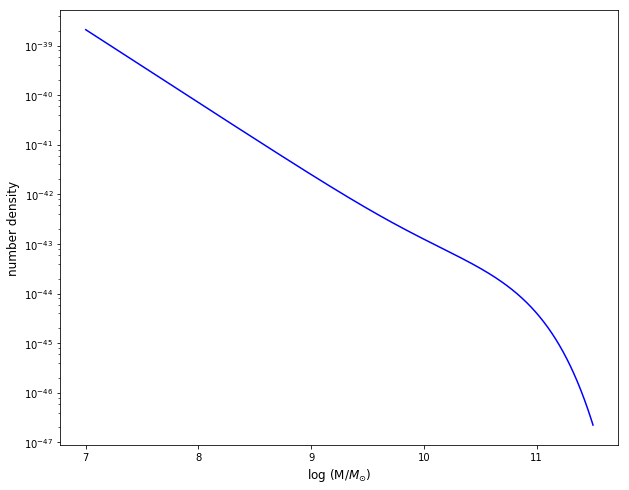

In [3]:
msolar = 1.989*10.**30. #solar mass in kg
m_ast = msolar*10.**10.66 #M*
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
mratio = 10.**logmratio
m = mratio*msolar #Creating an array of galaxy masses
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)**alpha2)/m_ast
#logphi = np.log10(phi)

plt.figure(figsize=(10,8))
plt.semilogy(logmratio,phi,'b-')
#plt.plot(logmratio,logphi)
plt.ylabel('number density',fontsize=12)
plt.xlabel('log (M/$M_{\odot}$)',fontsize=12)
plt.show()

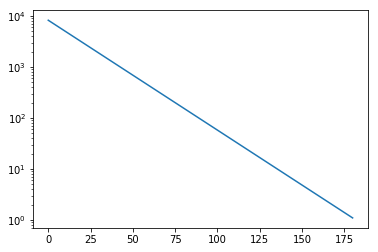

In [19]:
tau = 20.2
n0 = 8200
t=np.linspace(0,180,128)
n=n0*np.exp(-t/tau)
plt.semilogy(t,n)
plt.show()

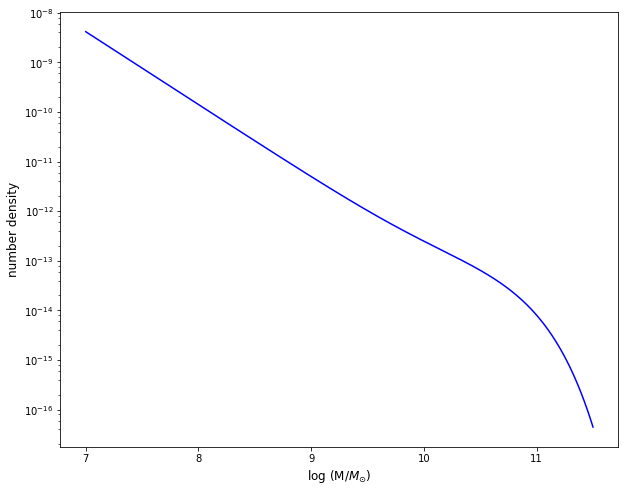

In [6]:
msolar = 1.989*10.**30. #solar mass in kg
m_ast = 10**10.66 #M*
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
mratio = 10**logmratio
m = mratio
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)**alpha2)/m_ast
#logphi = np.log10(phi)

plt.figure(figsize=(10,8))
plt.semilogy(logmratio,phi,'b-')
#plt.plot(logmratio,logphi)
plt.ylabel('number density',fontsize=12)
plt.xlabel('log (M/$M_{\odot}$)',fontsize=12)
plt.show()